<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment 2 #  
**Matthew Rice**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [ ]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
# Load the data
df = pd.read_csv('/content/gdrive/MyDrive/CS430/MLA/MLA2/Steel_industry_data.csv')
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


#### Rename the columns as indicated below:
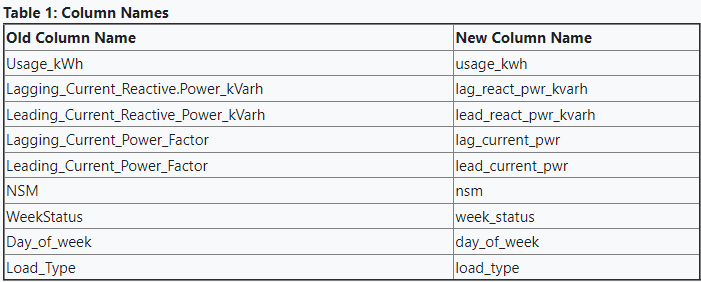

In [ ]:
# Rename columns according to table
df.rename(columns = {'Usage_kWh': 'usage_kwg', 'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh', 'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh', 'Lagging_Current_Power_Factor':'lag_current_pwr', 'Leading_Current_Power_Factor':'lead_current_pwr', 'NSM':'nsm', 'WeekStatus':'week_status', 'Day_of_week':'day_of_week', 'Load_Type':'load_type'}, inplace=True)
df.head()

,date,usage_kwg,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


### Statistical and Visual Exploration

In [ ]:
# Summarize the numerical columns of data
df.describe()

,usage_kwg,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [ ]:
# Look at types of columns and such
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  35040 non-null  object 
 1   usage_kwg             35040 non-null  float64
 2   lag_react_pwr_kvarh   35040 non-null  float64
 3   lead_react_pwr_kvarh  35040 non-null  float64
 4   CO2(tCO2)             35040 non-null  float64
 5   lag_current_pwr       35040 non-null  float64
 6   lead_current_pwr      35040 non-null  float64
 7   nsm                   35040 non-null  int64  
 8   week_status           35040 non-null  object 
 9   day_of_week           35040 non-null  object 
 10  load_type             35040 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 2.9+ MB


In [ ]:
# Check for missing values
df.isnull().sum()

,0
date,0
usage_kwg,0
lag_react_pwr_kvarh,0
lead_react_pwr_kvarh,0
CO2(tCO2),0
lag_current_pwr,0
lead_current_pwr,0
nsm,0
week_status,0
day_of_week,0


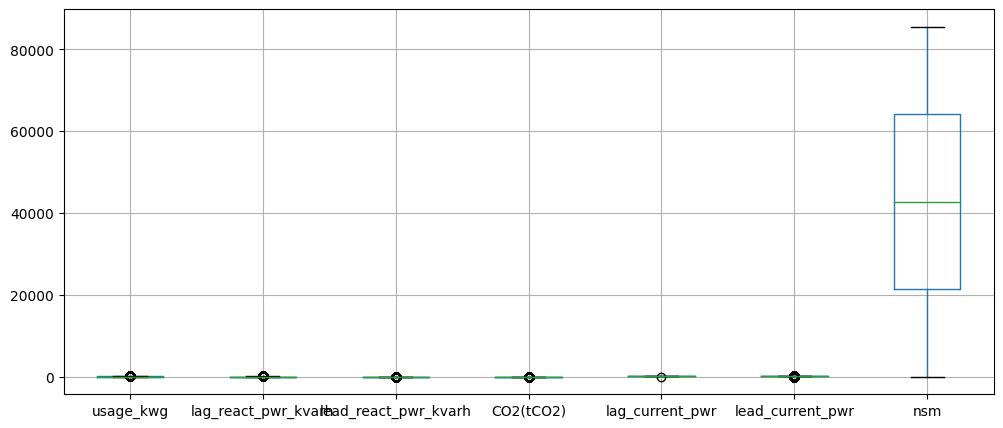

In [ ]:
# Use boxplot to check for outliers
df.boxplot(figsize=(12,5))
plt.show()

In [ ]:
# Calculate IQR for numerical features
numerical_variables = df.select_dtypes(include=['number']).columns
Q1 = df[numerical_variables].quantile(0.25)
Q3 = df[numerical_variables].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

usage_kwg                  48.0375
lag_react_pwr_kvarh        20.3400
lead_react_pwr_kvarh        2.0900
CO2(tCO2)                   0.0200
lag_current_pwr            35.7025
lead_current_pwr            0.3000
nsm                     42750.0000
dtype: float64


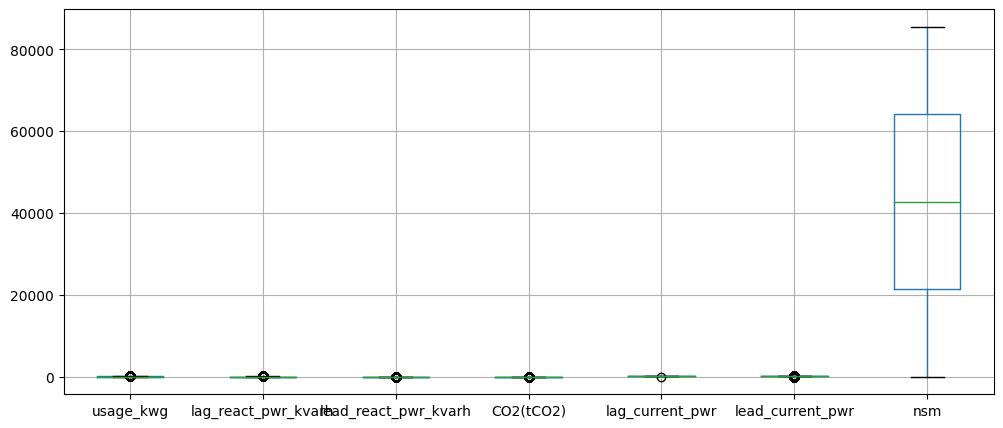

In [ ]:
# Remove outliers
#df = df[~((df[numerical_variables] < (Q1 - 1.5 * IQR)) |(df[numerical_variables] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Use boxplot to check for outliers
df.boxplot(figsize=(12,5))
plt.show()

This is much better as there are significantly less outliers.

In [ ]:
# Get counts of the different types of load types
load_types = pd.DataFrame(df['load_type'].value_counts())
load_types.head()

,count
load_type,
Light_Load,18072
Medium_Load,9696
Maximum_Load,7272


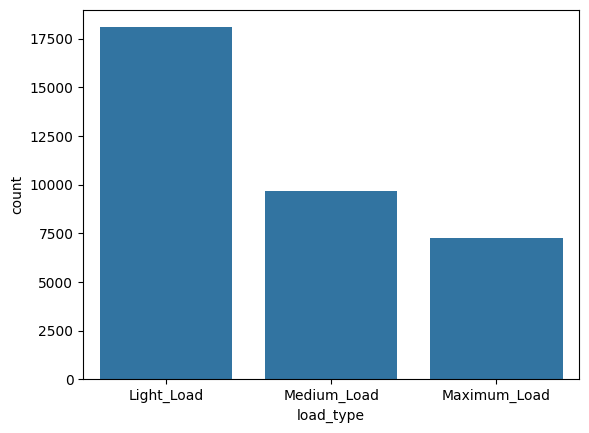

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Barplot to view how many days fall under each load type
sns.barplot(x='load_type', y='count', data=load_types)
plt.figure(figsize=(10,5))
plt.show()

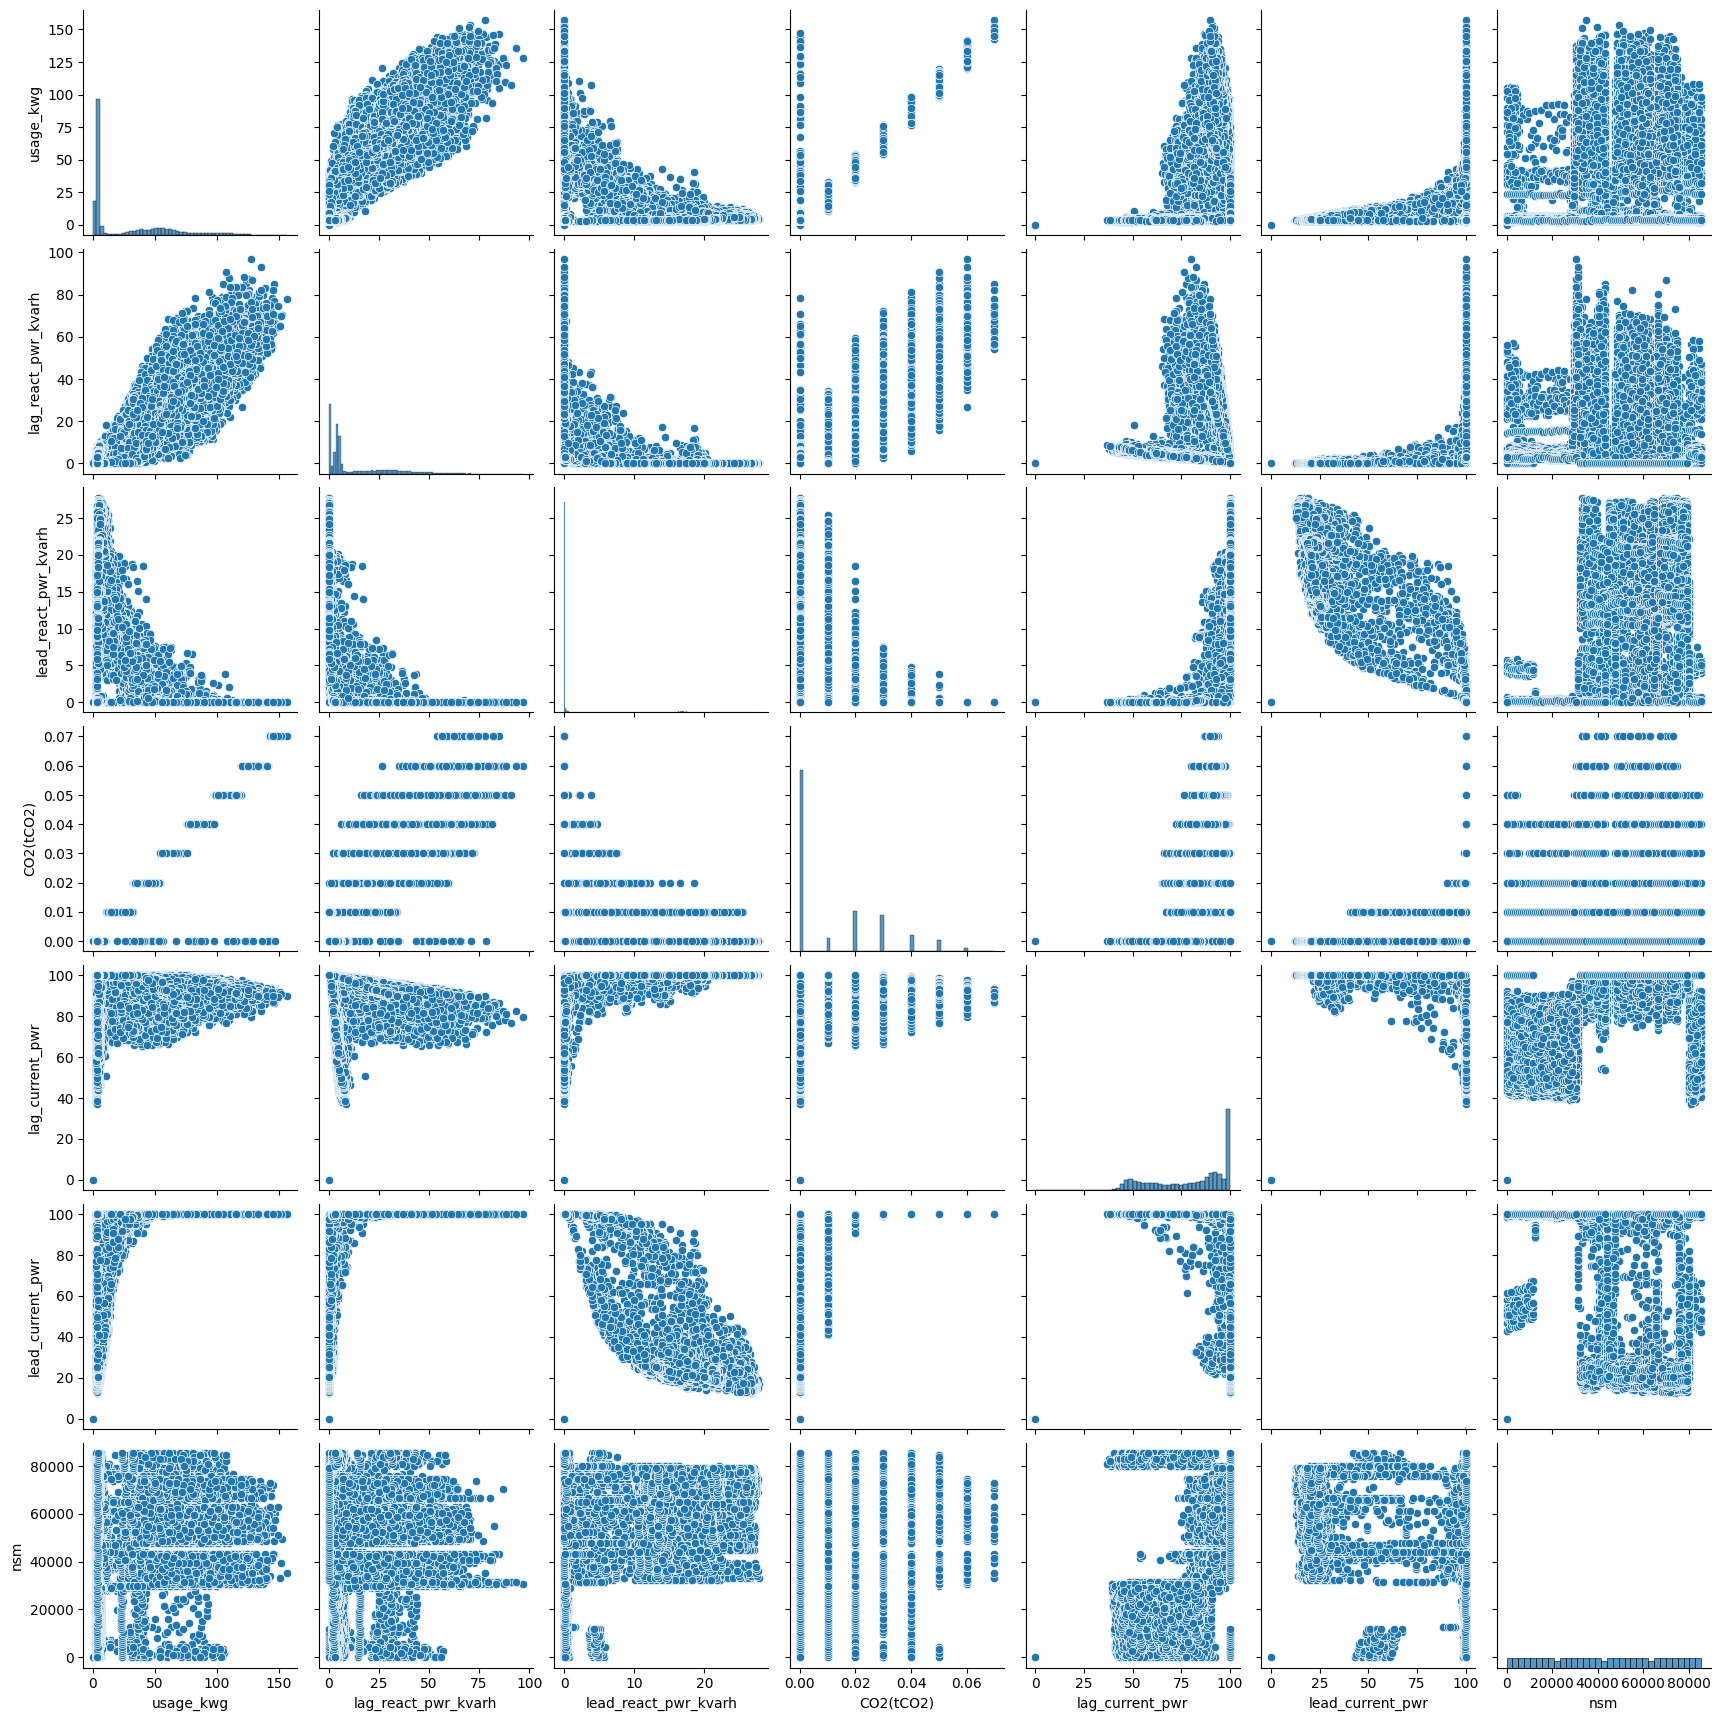

<Figure size 1000x500 with 0 Axes>

In [ ]:
# Pairplot of all of the numerical values
sns.pairplot(df.select_dtypes(include=['number']))
plt.figure(figsize=(10,5))
plt.show()

I noticed that each cell featuring CO2 has a series of vertical (or horizontal) lines. Additionally there is a lot of clustering on many of the plots which could suggest some grouping by categories. This can be most prevalently be seen in plots with nsm. It also appears that lag_react_pwr_kvarh has a positive linear correlation with usage_kwg. There also appear to be a lot of non linear relationships which could mean they have a polynomial relationship, specifically most plots with current_pwr.



### Splitting Data into Train/Test

In [ ]:
# Data frame of inputs and exclude date and usage_kwh
X = df.drop(['date', 'usage_kwg'], axis=1)

# Data frame of output
y = df['usage_kwg']

In [ ]:
# Split inputs into the train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [ ]:
# Splitting features into numerical and categorical
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Create pipeline to transform the data then run a linear regression model
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

### Executing the Model

In [ ]:
# Fit the model
linear_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['week_status', 'day_of_week', 'load_type'], dtype='object'))])),
                ('model', LinearRegression())])

### Evaluating Model

In [ ]:
# Predict on test set
y_pred = linear_pipeline.predict(X_test)

# RMSE for test and train
rmse_test = root_mean_squared_error(y_test, y_pred)
rmse_train = root_mean_squared_error(y_train, linear_pipeline.predict(X_train))

# Printing
print(f"Root Mean Squared Error Test: {rmse_test:.4f}")
print(f"Root Mean Squared Error Train: {rmse_train:.4f}")

Root Mean Squared Error Test: 4.2240
Root Mean Squared Error Train: 4.7858


 Before Outlier Handling:
  The Root Mean Squared Error for both test and Train are both over 4 which is not very satisfactory since the value of the target is quite small. This could indicate that linear regression is a poor fit for this dataset or that there is a poor relationship between the data. There could also be outliers that are messing with the accuracy of the prediction.
  After Outlier Handling: The results were slightly better, but still over 4 which likely indicates a poor fit.

In [ ]:
# R2 score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.9843


Before Outlier Handling: This R2 score of 0.9843 suggests that the model fits quite well, but since the RMSE is not very good, it is likely that the model is overfitted or there are some large outliers.

After Outlier Handling: The R2 score actually decreased after outlier handling which likely means the model is overfitted

### Conclusion
The model is likely overfitted as it yields an unsatisfactory RMSE regardless of whether or not outliers are handled beforehand. Additionally the R2 score decreased after outlier handling which reinforces that it might be overfitted. Perhaps another model will fare better.

## Problem 2

### Reading the Data

In [ ]:
# Code the week_status to be 1 if it is a weekday and 0 if not
df['week_status'] = df['week_status'].replace({'Weekday': 1, 'Weekend' : 0})
df['week_status'].head()

<ipython-input-28-a665df1ab449>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['week_status'] = df['week_status'].replace({'Weekday': 1, 'Weekend' : 0})


,week_status
0,1
1,1
2,1
3,1
4,1


### Splitting Data into Train/Test

In [ ]:
# Data frame of inputs and exclude date, week_status, and day_of_week
X = df.drop(['date', 'week_status', 'day_of_week'], axis=1)

# Data frame of output
y = df['week_status']

In [ ]:
# Split the data into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [ ]:
# Splitting features into numerical and categorical
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing for both types of features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Create pipeline to transform the data then run a logistic regression model
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LogisticRegression())])

### Executing the Model

In [ ]:
logistic_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['usage_kwg', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['load_type'], dtype='object'))])),
                ('model', LogisticRegression())])

### Evaluating Model

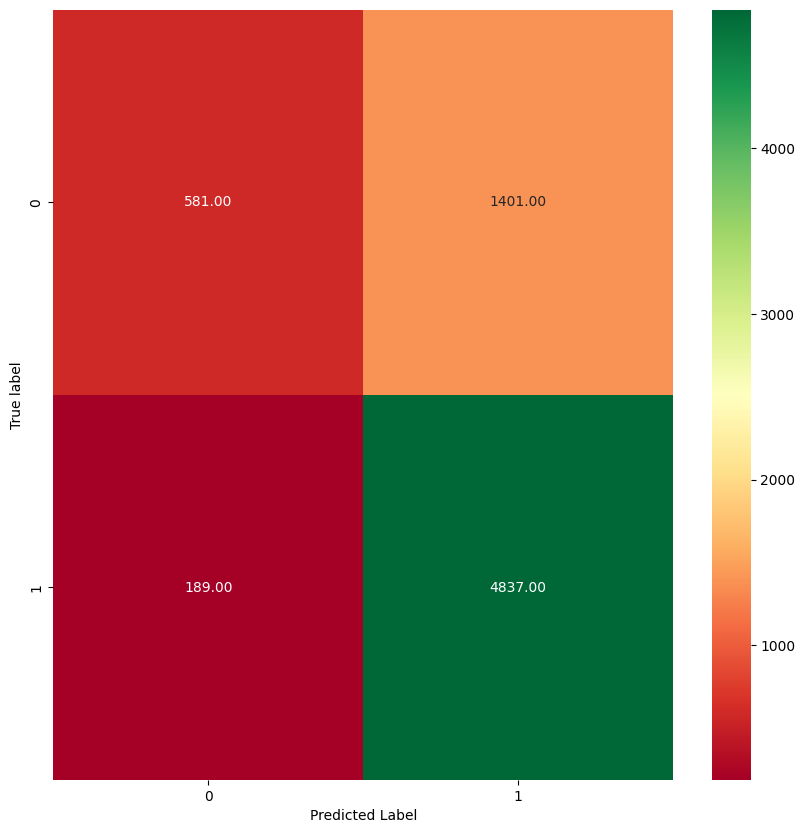

In [ ]:
# Predict on test set
y_pred = logistic_pipeline.predict(X_test)

# Plot the confusion matrix using plot_cm
plot_cm(y_test, y_pred)




There are more false positives than true negatives which is concerning, but there are also a lot of true positives so it seems the model is more likely to predict true which might mean it's overfitted.

In [ ]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.7754
Recall: 0.9624
F1 Score: 0.8588


This model performed well overall as it had an excellent recall score meaning it is very good at predicting true positive instances. It also had a decent precision score of .77 meaning that 77% of the outcomes the model predicted as positive were positive meaning it is fairly accurate. The F1 score shows that the model is better at predicting positives than reducing false positive which can also be seen from the confusion matrix where a lot of false positives were present.

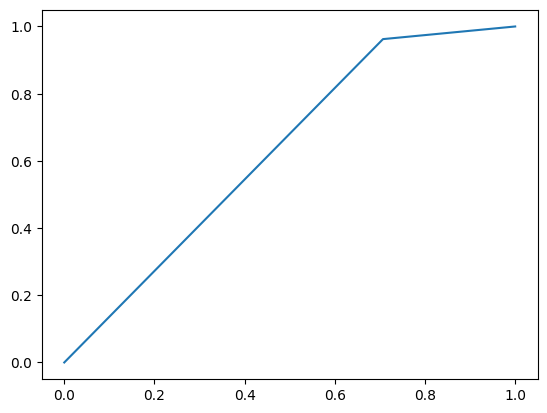

In [ ]:
# Generate an ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC Curve
plt.plot(fpr, tpr)

### Conclusion
 Overall, the model is effective and likely more effective than the linear regression model. Since neither of the models produced exceptional results, there might not be a significant relationship between the inputs and the target which would make it difficult to predict the value of the target. The logistic regression model had many false positives, but also many true positives so it was more likely to classify things as positive which I mentioned previously and can be seen in the confusion matrix. The ROC curve shows that the model has decent effectiveness, but definitely could be better.